In [41]:
import numpy as np



In [42]:
# This function is to check if the neighbor cells are empty
# to be used in conjunction with random walk
def neighbors(board,i,j,size):
    fset = [(-1,0),(1,0),(0,-1),(0,1)]
    list1 = []
    
    for (dx,dy) in fset:
        # Y = I
        k = i + dy
        # X = J
        l = j + dx
        #print(k,l)
        if (k,l) != (i,j) and 0 <= k <= size-1 and  0 <= l <= size-1:
            list1.append([k,l])
    
    return list1

In [43]:
# This function is to check whether if the 
# neighboring cell is part of the aggregate
def agg_check(board,i,j,size):
    fset = [(-1,0),(1,0),(0,-1),(0,1)]
    list1 = []
    
    for (dx,dy) in fset:
        # Y = I
        k = i + dy
        # X = J
        l = j + dx
        #print(k,l)
        if (k,l) != (i,j) and 0 <= k <= size-1 and  0 <= l <= size-1:
            list1.append(board[k][l])

    if 1 in list1: return True#, list1
    else: return False#, list1

In [44]:
from numpy.random import randint


def DLA(R_kill,rad_var,mass_var,center,L_size,steps):
    Lattice = np.zeros((L_size,L_size))
    Lattice[center,center] = 1
    mass_list = [1]
    D_list = [0]


    for i in range(steps):

        # Setting up a random starting point for the walker
        start = 'blocked'
        while start == 'blocked':
            X = np.random.randint(0,L_size)
            Y = np.random.randint(0,L_size)
            distance = np.sqrt(((X-center)**2)+(Y-center)**2)
            if  R_kill > distance >= rad_var+5:
                Lattice[Y,X] = 1
                start = 'clear'
            else:
                start = 'blocked'
    #print(Lattice)


        walking = True
        while walking == True:
            if agg_check(Lattice,Y,X,L_size) == False:


                # Random walk
                neighbor_list = neighbors(Lattice,Y,X,L_size)
                rng1 = np.random.randint(0,len(neighbor_list))
                Lattice[neighbor_list[rng1][0]][neighbor_list[rng1][1]] = 1
                Lattice[Y,X] = 0
                X = neighbor_list[rng1][1]
                Y = neighbor_list[rng1][0]

                # Kill Check
                distance = np.sqrt(((X-center)**2)+(Y-center)**2)
                if distance == R_kill:
                    Lattice[Y,X] = 0
                    walking = False
                
                # Aggregation Check
                if agg_check(Lattice,Y,X,L_size) == True:
                    walking = False
                    mass_var = mass_var + 1
                    mass_list.append(mass_var)
                    if distance > rad_var:
                        rad_var = distance
                    R_max = rad_var + 5
                    D = np.log(mass_var)/np.log(R_max)
                    D_list.append(D)
            
            else:
                walking = False
    
    #Variable reset
    rad_var = 1
    mass_var = 1
    return Lattice, D_list

Text(0.5, 1.0, 'D - distribution')

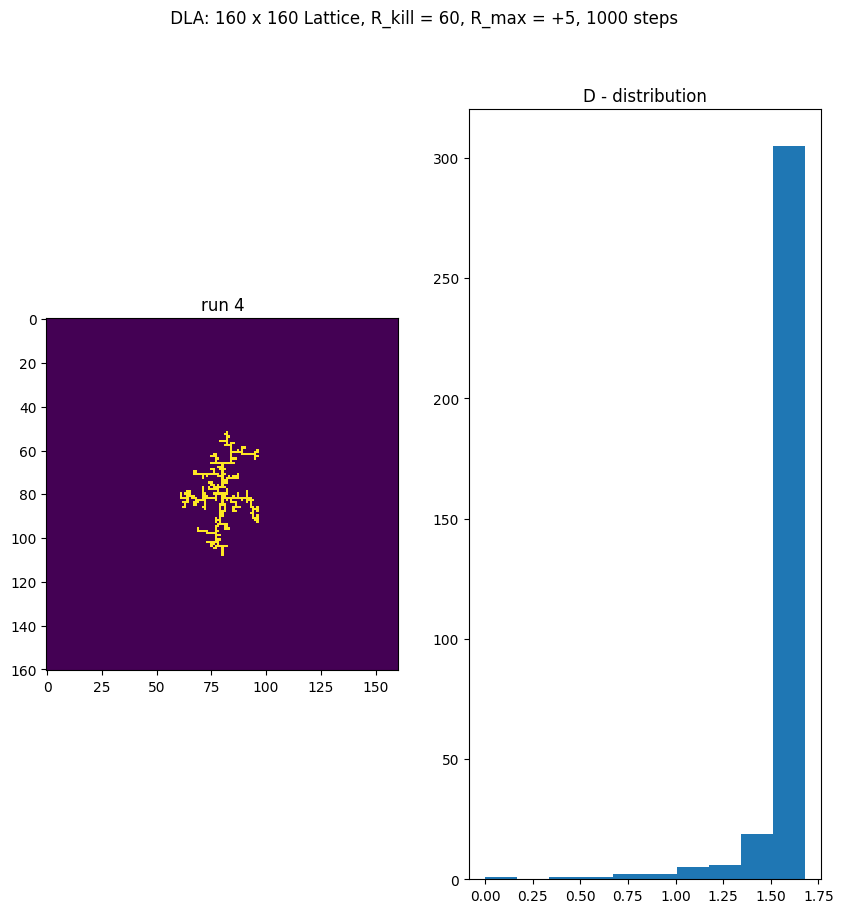

In [45]:
radius = 1
mass = 1
run1 = DLA(60,radius,mass,80,161,1000)



from matplotlib import pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,10))
fig.suptitle(' DLA: 160 x 160 Lattice, R_kill = 60, R_max = +5, 1000 steps')
ax1.imshow(run1[0], interpolation='nearest')
ax1.set_title("run 4")
ax2.hist(run1[1])
ax2.set_title("D - distribution")

